# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Farid Arabameri - 428368
    
    2. Turkan Akcalar Bayter - 433391
    
    3.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from p_decision_tree.DecisionTree import DecisionTree
import graphviz
import pydotplus
import networkx
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import SVR
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [2]:
data = pd.read_csv("AirBnB_original.csv")
data.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [4]:
initial_rows=data.shape[0]
data.dropna(inplace=True)
print(f'Number of NaN rows:{initial_rows-data.shape[0]}')
#1477 rows were dropped

Number of NaN rows:1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [5]:
initial_rows=data.shape[0]
data = data[~data.id.duplicated(keep='first')]
print(f'Number of duplicated rows:{initial_rows-data.shape[0]}')
#389 rows were dropped

Number of duplicated rows:389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first, the third percentile, and the standard deviation.

In [3]:
data2 = pd.read_csv("AirBnB_cleaned.csv")
print(f'The average price is: {round(np.average(data2.price),2)}')
print(f'The first percentile of the price is: {np.percentile(data2.price,25)}')
print(f'The third percentile of the price is: {np.percentile(data2.price,75)}')
print(f'The standard deviation of the price is: {round(np.std(data2.price),2)}')

The average price is: 625.46
The first percentile of the price is: 340.0
The third percentile of the price is: 913.0
The standard deviation of the price is: 331.23


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

Text(0.5, 1.0, 'Box plot of the prices')

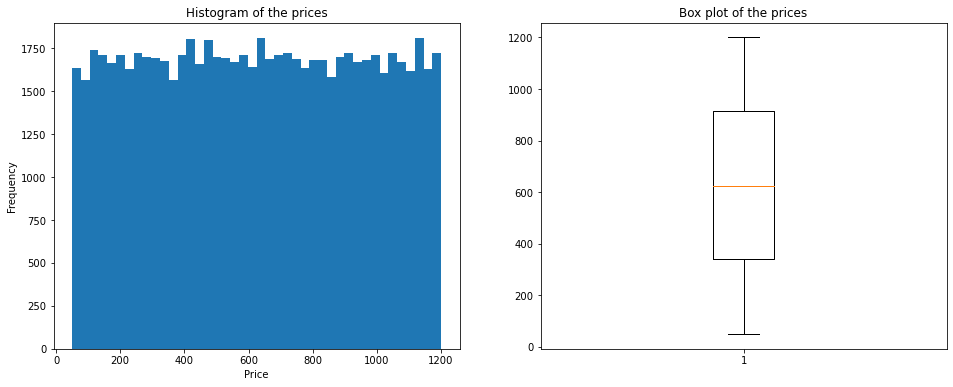

In [4]:
fig, axs = plt.subplots(1, 2,figsize=(16,6))
#Ploting histogram with the optimal number of bins based on Freedman-Diaconis rule
axs[0].hist(data2['price'],bins=int((np.ptp(data2.price) / ((2 * (np.percentile(data2.price,75)-np.percentile(data2.price,25))) / np.power(data2.shape[0], 1/3))) + 1))
axs[0].set_title('Histogram of the prices')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[1].boxplot(data2['price'],positions=[1])
axs[1].set_title('Box plot of the prices')

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

Text(0.5, 1.0, 'Correlations between variables')

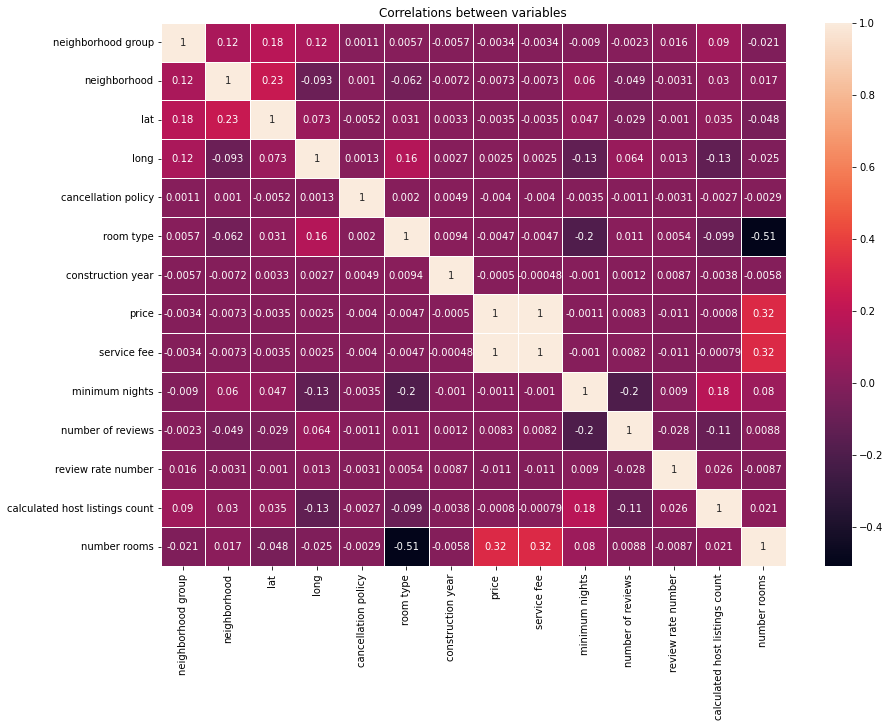

In [5]:
data_float=data2[['neighborhood group','neighborhood','lat','long','cancellation policy','room type','construction year','price','service fee','minimum nights','number of reviews','review rate number','calculated host listings count','number rooms']].copy()
data_float['neighborhood group']=data_float['neighborhood group'].astype('category').cat.codes
data_float['neighborhood']=data_float['neighborhood'].astype('category').cat.codes
data_float['cancellation policy']=data_float['cancellation policy'].astype('category').cat.codes
data_float['room type']=data_float['room type'].astype('category').cat.codes
m=data_float.to_numpy()
n=np.corrcoef(m.astype(float), rowvar=False)
data_corr2=pd.DataFrame(data=n,columns=['neighborhood group','neighborhood','lat','long','cancellation policy','room type','construction year','price','service fee','minimum nights','number of reviews','review rate number','calculated host listings count','number rooms'],index=['neighborhood group','neighborhood','lat','long','cancellation policy','room type','construction year','price','service fee','minimum nights','number of reviews','review rate number','calculated host listings count','number rooms'])
fig, ax = plt.subplots(figsize=(14,10)) 
sn.heatmap(data_corr2, annot= True, linewidths=.5)
plt.title("Correlations between variables")

_Answer:_  Based on the correlations we know that price has a good correlations with number of rooms which makes it a good variable while service fee has correlation of 1 which based on the prior explanations makes it an unsuitable variable. latitude and longitude are somehow seen in the neighborhood group so having them together might not be the best idea. other than that room type and room number have good negative correlation with each other which makes having them both a little bit doubtful but they might still good for price logically. id,host id, country code and calculated host listing count are irrelevant. neighborhood is definetly relevant and must be used while narrowing it down to neighbor might or might not add any new information but it must be investigated. construction year is also relevant as newer houses logically are better priced. minimum nights does not add any information so it's not good to add it. Review rates can affect the prices through time but since it is a new apartment for now it does not affect it. number of rooms is also relevant and important.


### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

Text(10, 800, 'Correlation coefficient = 1.0')

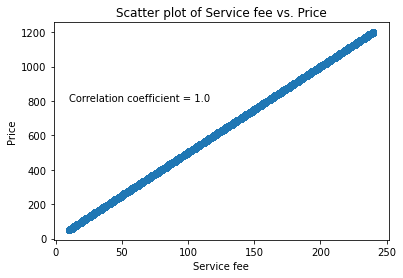

In [6]:
#Replacing space with underline to address th columns with ease
data2.columns = [c.replace(' ', '_') for c in data2.columns]
#make a copy of the cleaned dataframe
data3=data2.copy()
#Encoding required categorical data
data3.neighborhood_group=data3.neighborhood_group.astype('category').cat.codes
data3.room_type=data3.room_type.astype('category').cat.codes
data3.cancellation_policy=data3.cancellation_policy.astype('category').cat.codes
#Making a new dataframe from what we need
data4=data3[["price","service_fee","minimum_nights","neighborhood_group","room_type","cancellation_policy","construction_year","number_rooms"]]
plt.scatter(data4.service_fee,data4.price)
plt.xlabel("Service fee")
plt.ylabel("Price")
plt.title("Scatter plot of Service fee vs. Price")
plt.annotate("Correlation coefficient = {:.1f}".format(np.corrcoef(data4.price, data4.service_fee)[1][1]), (10, 800))

_Answer:_ It appears thatr Service fee and price are perfectly correlated but we would argue that most probably it is not a helpful feature because it adds no new information and it appears that service fee is linear function of the price itself.



Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

Text(1.5, 1000, 'Linear regression equation=-0.155*X+626.0')

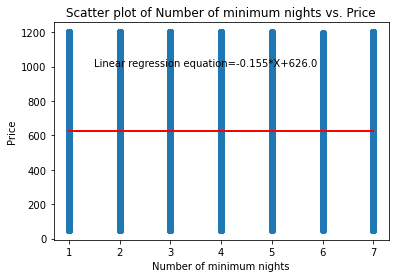

In [9]:
plt.scatter(data4.minimum_nights,data4.price)
m, b = np.polyfit(data4.minimum_nights,data4.price, 1)
plt.plot(data4.minimum_nights, m*data4.minimum_nights+b,'-r')
plt.xlabel("Number of minimum nights")
plt.ylabel("Price")
plt.title("Scatter plot of Number of minimum nights vs. Price")
plt.text(1.5,1000,"Linear regression equation={:.3}*X+{:.4}".format(m, b))

_Answer:_ It appears that price range for number of nights does not vary significantly which is to be expected since for example one night in an expensive Airbnb might cost as much as 7 nights in a cheap one. The regression line equation also indicates that intercept corresponds to the mean value which indicates that this parameter can not be used to estimate the price.



To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

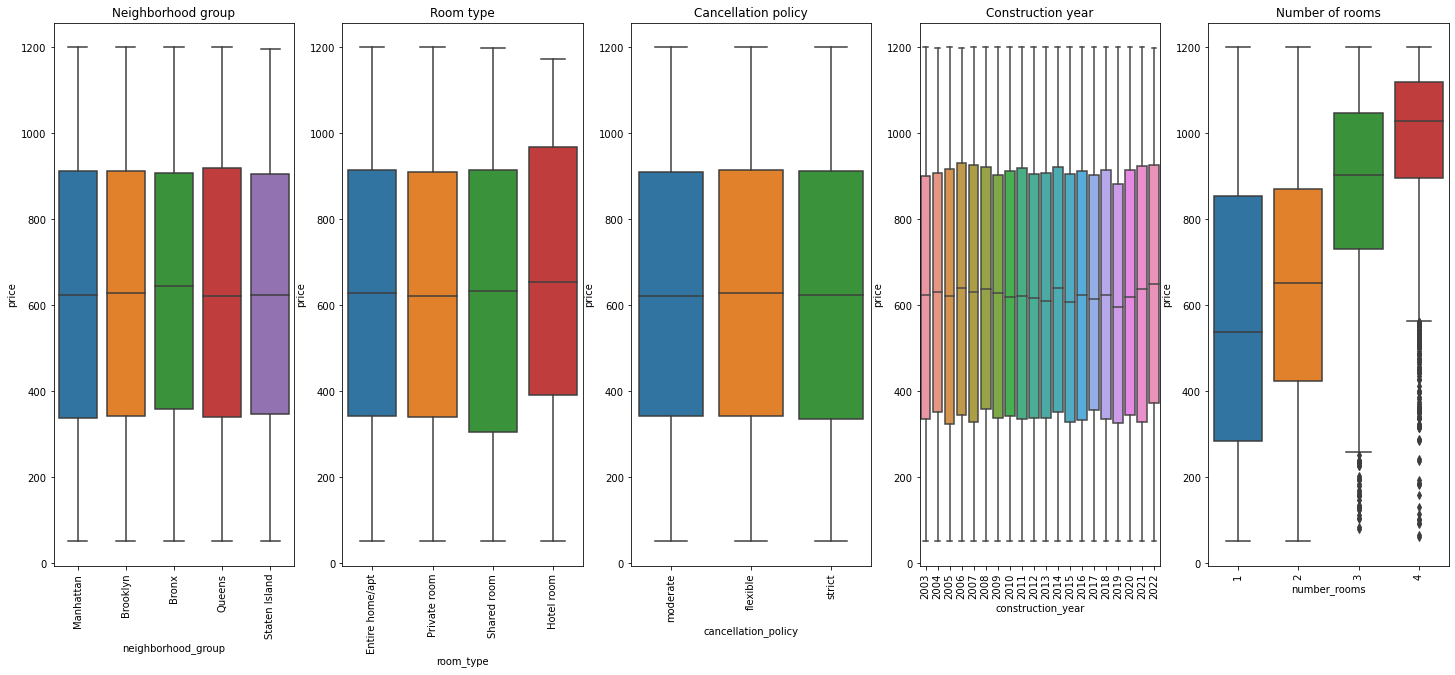

In [9]:
fig, axs = plt.subplots(1,5, figsize=(25,10))

a=sn.boxplot(x='neighborhood_group', y='price', data=data2, ax=axs[0])
axs[0].set_title('Neighborhood group')
a.set_xticklabels(a.get_xticklabels(),rotation=90)

b=sn.boxplot(x='room_type', y='price', data=data2, ax=axs[1])
axs[1].set_title('Room type')
b.set_xticklabels(b.get_xticklabels(),rotation=90)

c=sn.boxplot(x='cancellation_policy', y='price', data=data2, ax=axs[2])
axs[2].set_title('Cancellation policy')
c.set_xticklabels(c.get_xticklabels(),rotation=90)

d=sn.boxplot(x='construction_year', y='price', data=data2, ax=axs[3])
axs[3].set_title('Construction year')
d.set_xticklabels(d.get_xticklabels(),rotation=90)

e=sn.boxplot(x='number_rooms', y='price', data=data2, ax=axs[4])
axs[4].set_title('Number of rooms')
e.set_xticklabels(e.get_xticklabels(),rotation=90)

_Answer:_
It appears that cancellation policy does not have any effect on the prices as well as construction year considering their IQR and median. Neighborhood group and room type have little effect on the price (room type have a little more) but number of rooms covers all ranges of prices with different medians for each number and adequate IQR to cover different prices.


### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

Text(0.5, 1.0, 'Neighborhood Group - Room type')

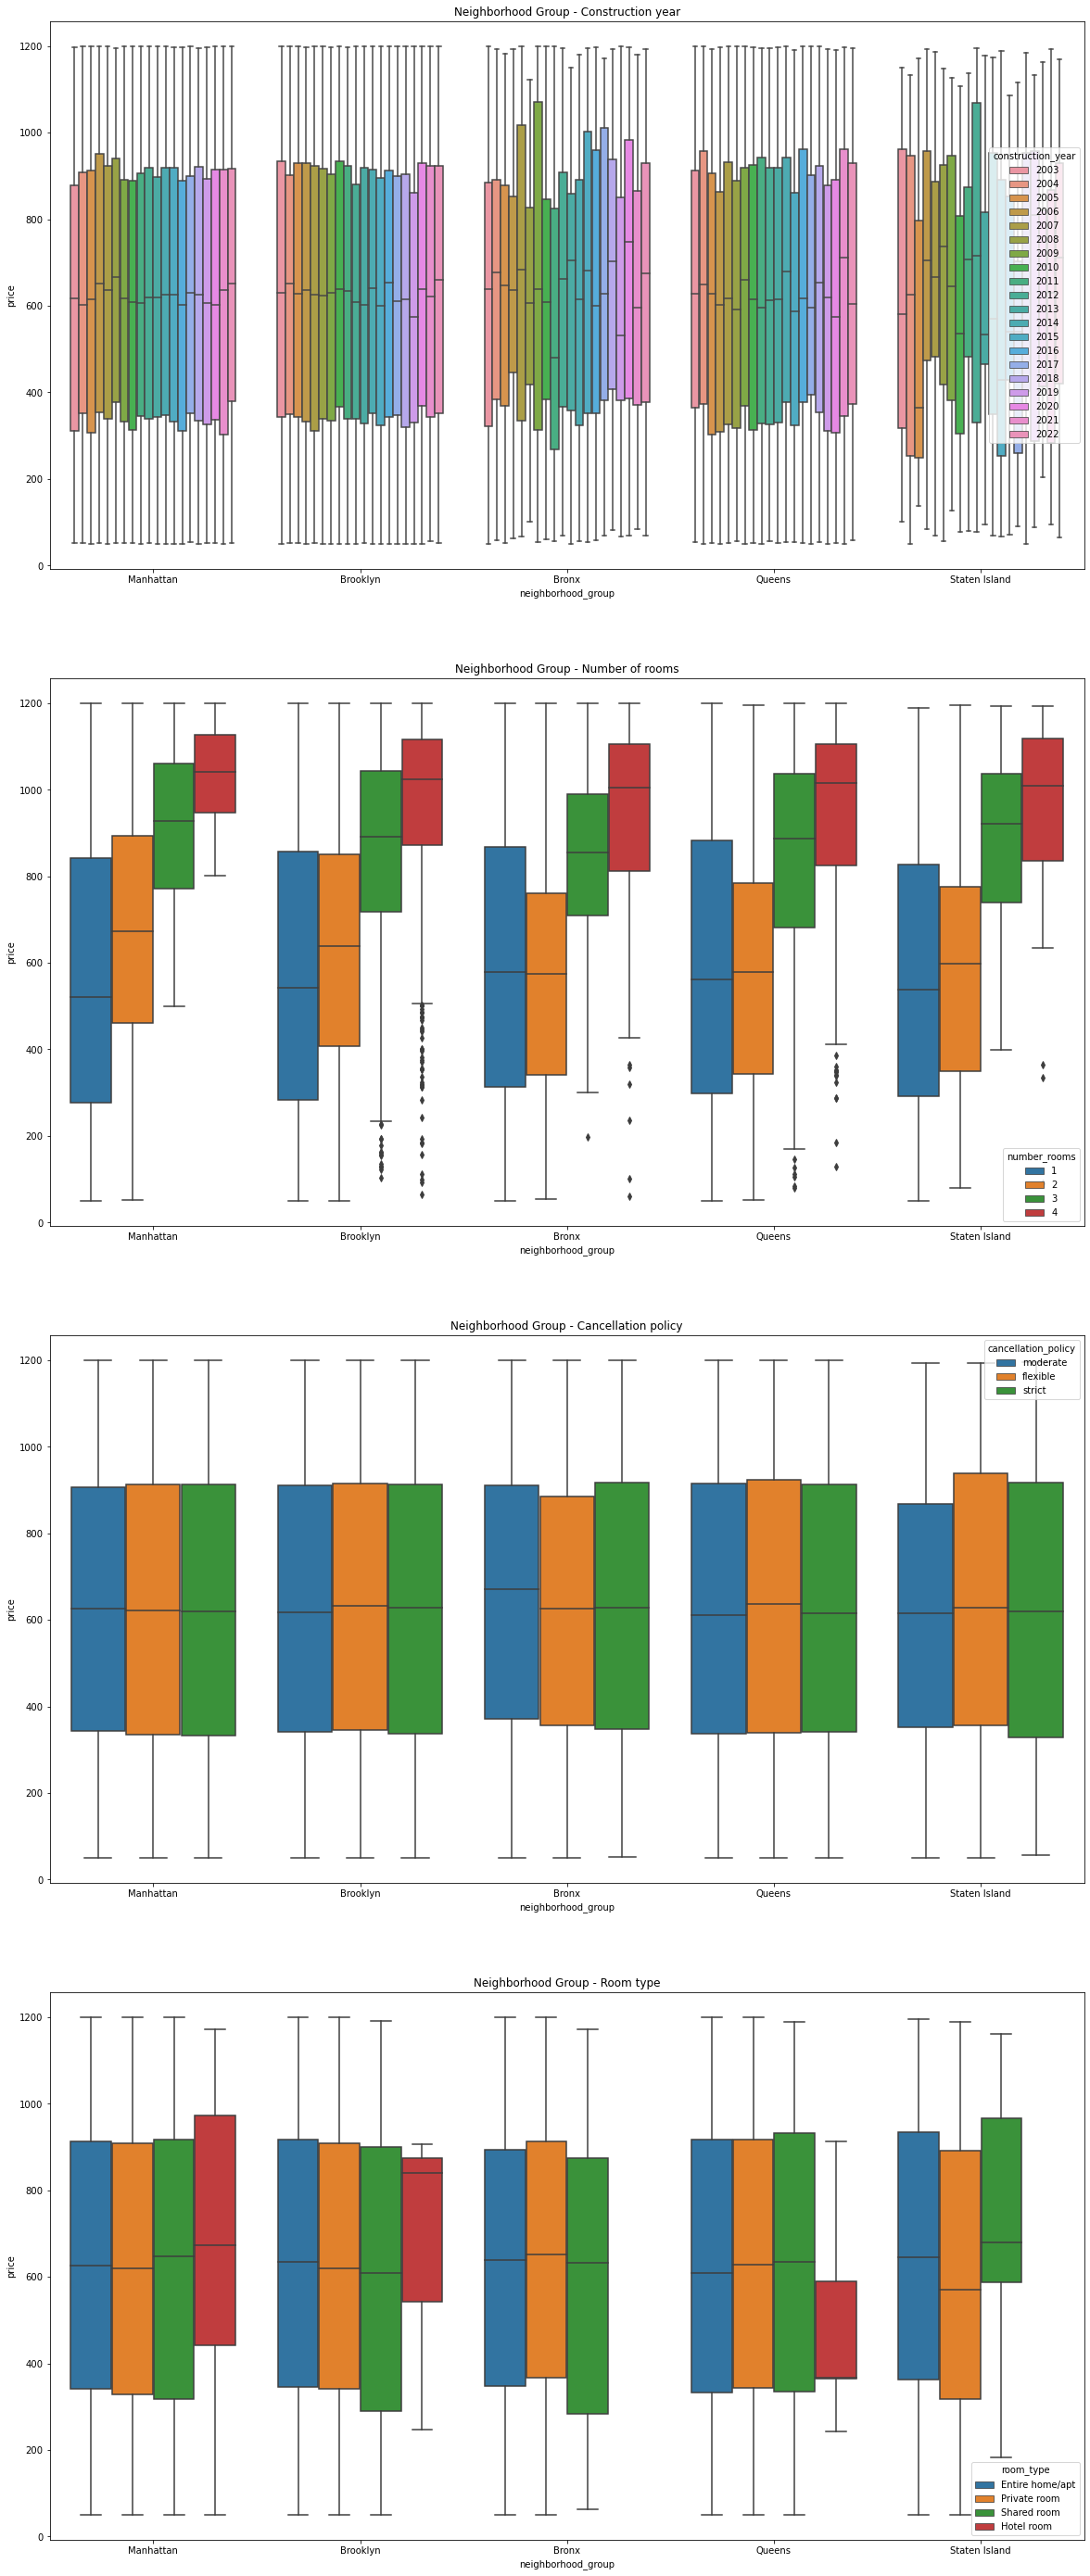

In [11]:
fig, axs = plt.subplots(4,1, figsize=(20,50))

a=sn.boxplot(x = data2['neighborhood_group'],y = data2['price'],hue = data2['construction_year'], ax=axs[0])
axs[0].set_title('Neighborhood Group - Construction year')

b=sn.boxplot(x = data2['neighborhood_group'],y = data2['price'],hue = data2['number_rooms'], ax=axs[1])
axs[1].set_title('Neighborhood Group - Number of rooms')

c=sn.boxplot(x = data2['neighborhood_group'],y = data2['price'],hue = data2['cancellation_policy'], ax=axs[2])
axs[2].set_title('Neighborhood Group - Cancellation policy')

d=sn.boxplot(x = data2['neighborhood_group'],y = data2['price'],hue = data2['room_type'], ax=axs[3])
axs[3].set_title('Neighborhood Group - Room type')

_Answer:_
Neighborhood group and number of rooms seems like a descent combination aslo we would argue that neighborhood group and room type in the second place is a good combination but the others don't make any descent ones.


#### Multivariate Analysis for Room Type

Text(0.5, 1.0, 'Room type - Neighborhood group')

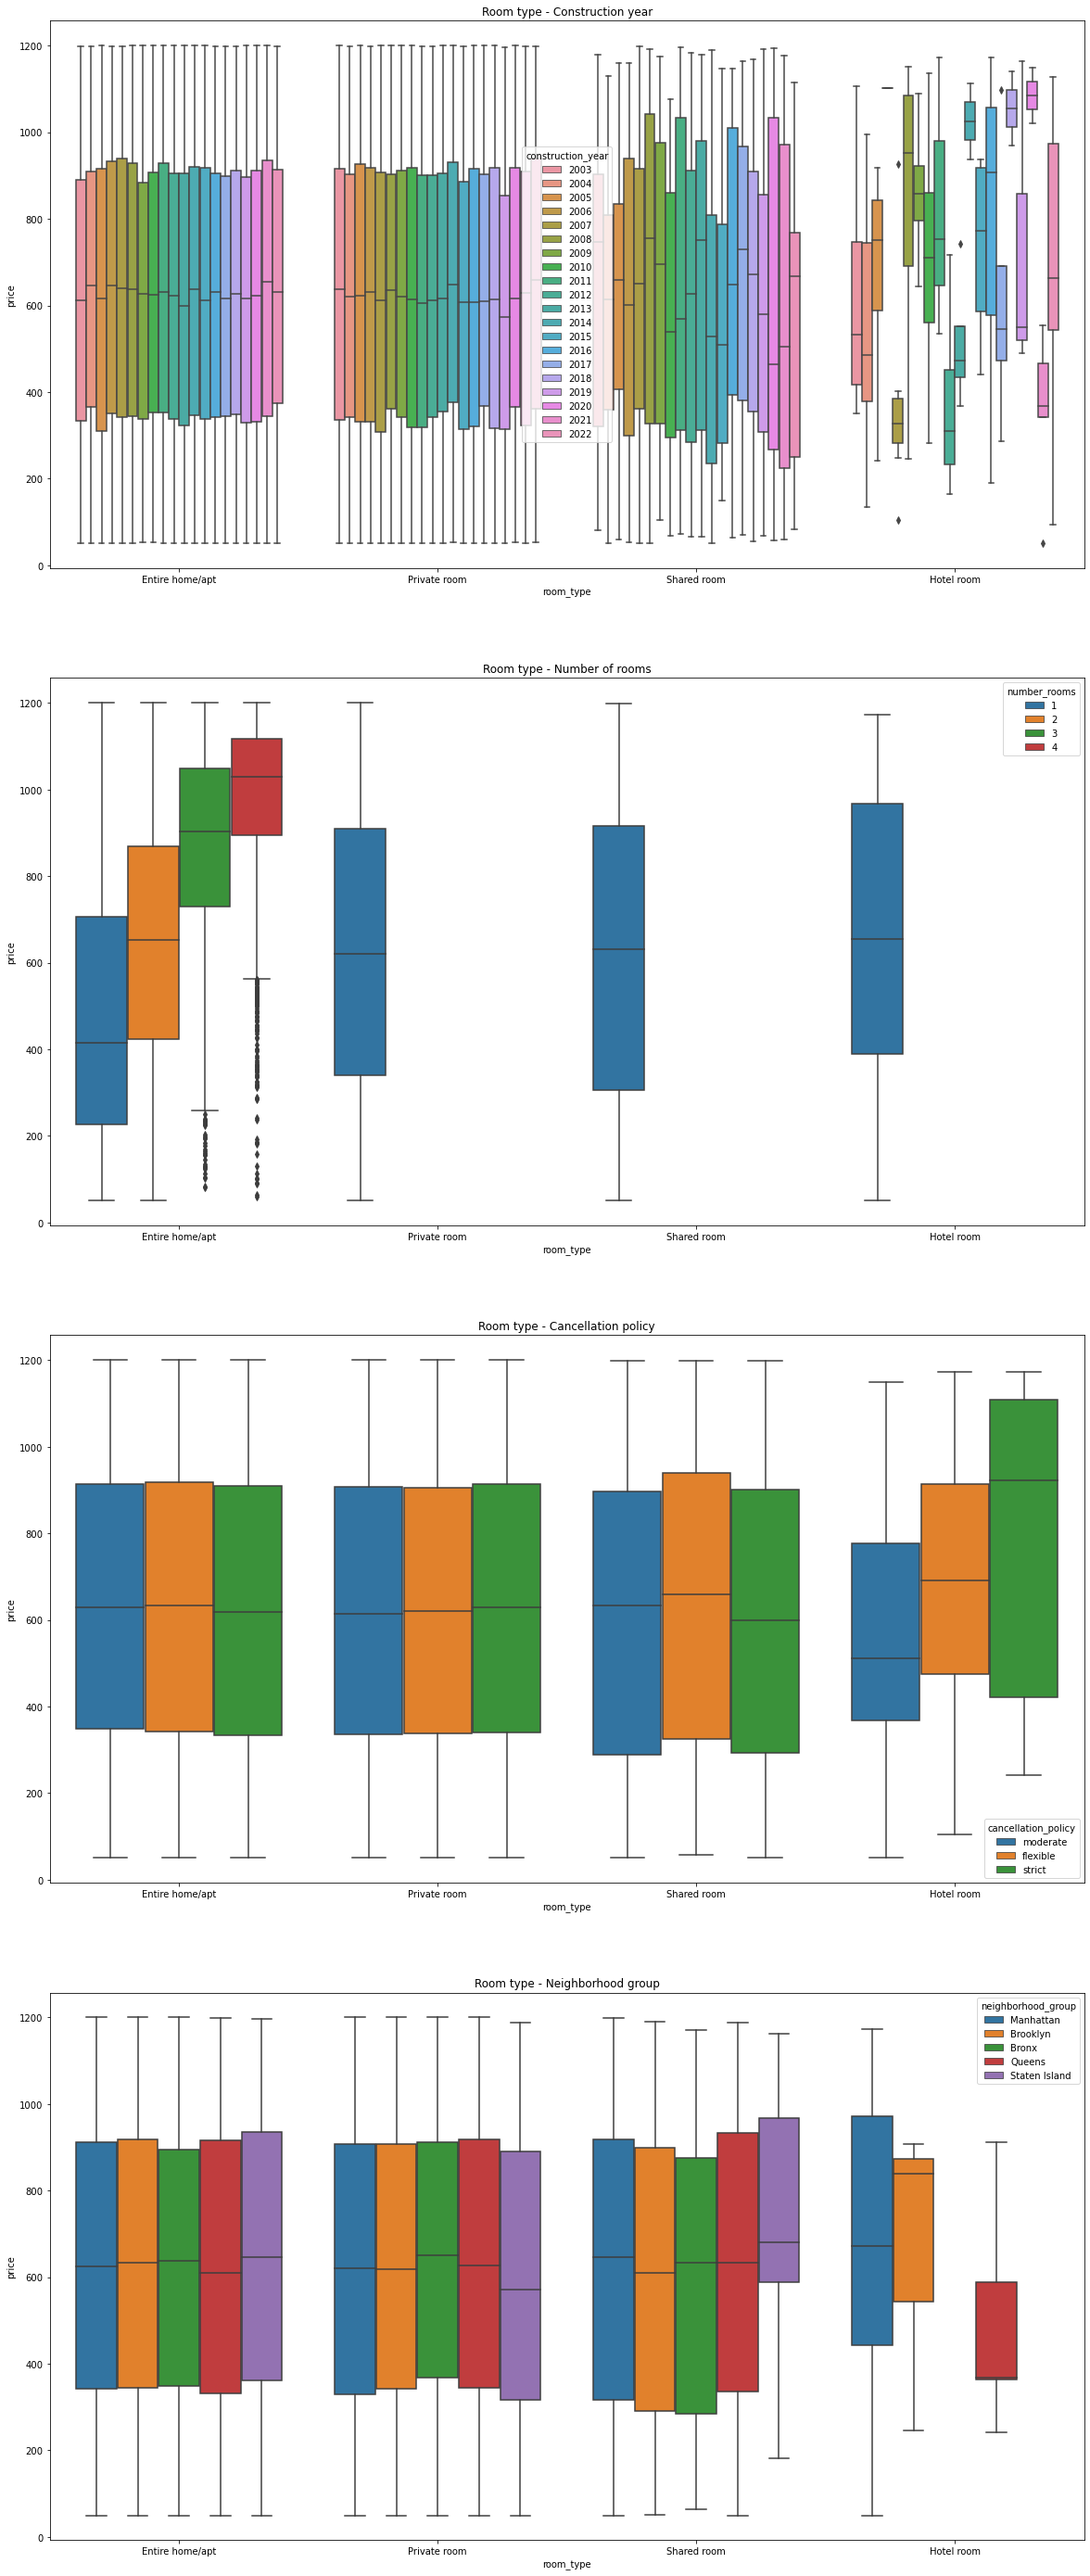

In [12]:
fig, axs = plt.subplots(4,1, figsize=(20,50))

a=sn.boxplot(x = data2['room_type'],y = data2['price'],hue = data2['construction_year'], ax=axs[0])
axs[0].set_title('Room type - Construction year')

b=sn.boxplot(x = data2['room_type'],y = data2['price'],hue = data2['number_rooms'], ax=axs[1])
axs[1].set_title('Room type - Number of rooms')

c=sn.boxplot(x = data2['room_type'],y = data2['price'],hue = data2['cancellation_policy'], ax=axs[2])
axs[2].set_title('Room type - Cancellation policy')

d=sn.boxplot(x = data2['room_type'],y = data2['price'],hue = data2['neighborhood_group'], ax=axs[3])
axs[3].set_title('Room type - Neighborhood group')

_Answer:_ Room type and number of rooms provide information only in case of "Entire home/apt" and for the other ones only for "Hotel room" we can have a good combination but generally not for every type. 


#### Multivariate Analysis for Number of Rooms

Text(0.5, 1.0, 'Number of rooms - Neighborhood group')

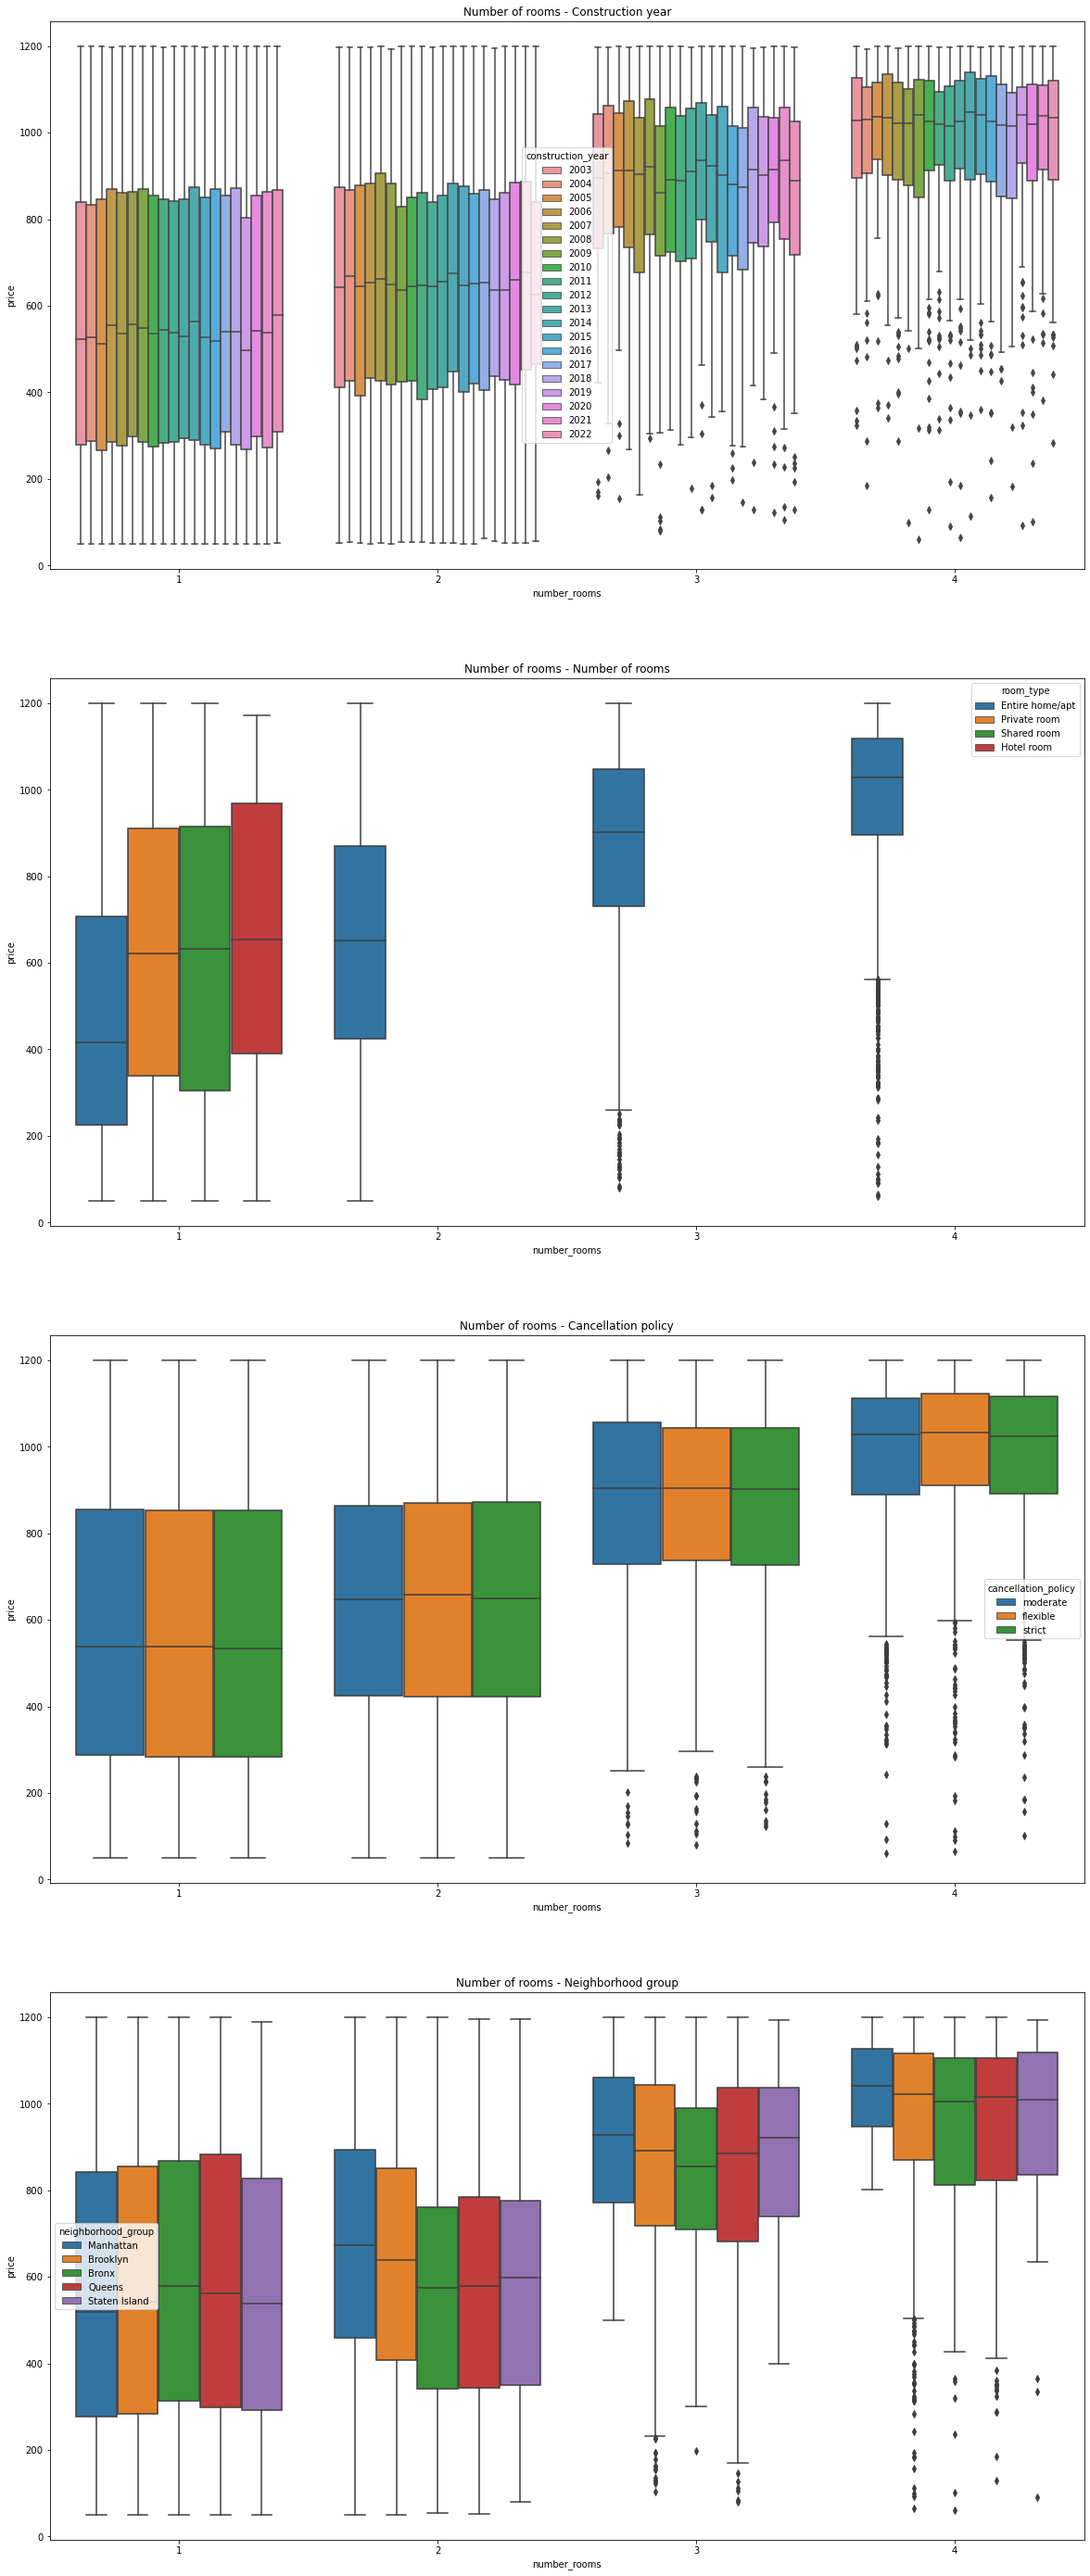

In [13]:
fig, axs = plt.subplots(4,1, figsize=(20,50))

a=sn.boxplot(x = data2['number_rooms'],y = data2['price'],hue = data2['construction_year'], ax=axs[0])
axs[0].set_title('Number of rooms - Construction year')

b=sn.boxplot(x = data2['number_rooms'],y = data2['price'],hue = data2['room_type'], ax=axs[1])
axs[1].set_title('Number of rooms - Number of rooms')

c=sn.boxplot(x = data2['number_rooms'],y = data2['price'],hue = data2['cancellation_policy'], ax=axs[2])
axs[2].set_title('Number of rooms - Cancellation policy')

d=sn.boxplot(x = data2['number_rooms'],y = data2['price'],hue = data2['neighborhood_group'], ax=axs[3])
axs[3].set_title('Number of rooms - Neighborhood group')

_Answer:_
Number of rooms generaly make a descent combination with the other factors


#### Multivariate Analysis for Construction Year

Text(0.5, 1.0, 'construction year - Neighborhood group')

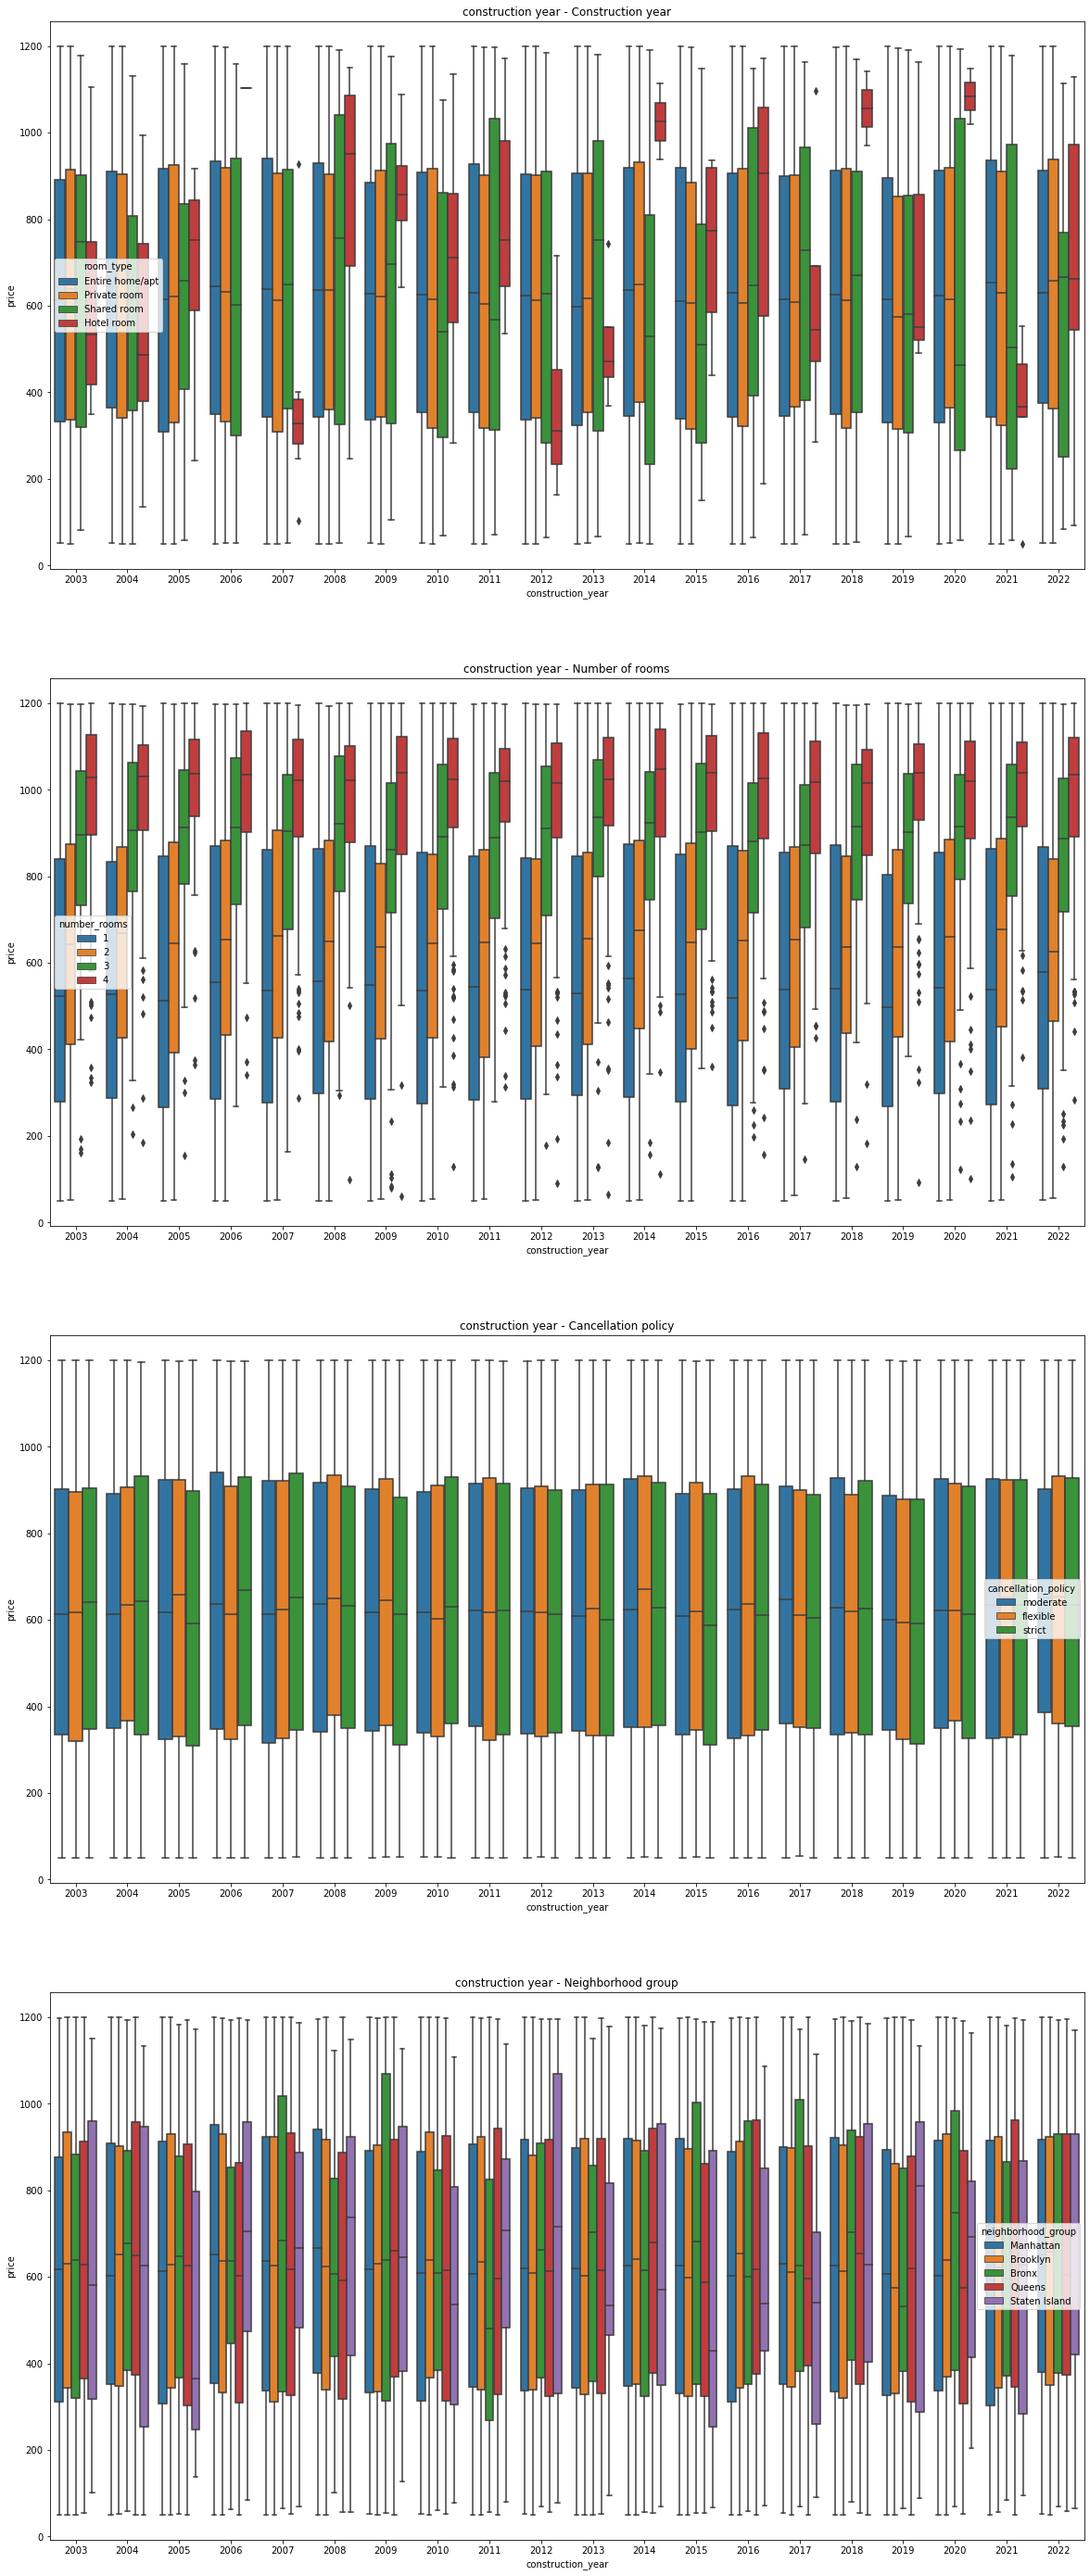

In [7]:
fig, axs = plt.subplots(4,1, figsize=(20,50))

a=sn.boxplot(x = data2['construction_year'],y = data2['price'],hue = data2['room_type'], ax=axs[0])
axs[0].set_title('construction year - Construction year')

b=sn.boxplot(x = data2['construction_year'],y = data2['price'],hue = data2['number_rooms'], ax=axs[1])
axs[1].set_title('construction year - Number of rooms')

c=sn.boxplot(x = data2['construction_year'],y = data2['price'],hue = data2['cancellation_policy'], ax=axs[2])
axs[2].set_title('construction year - Cancellation policy')

d=sn.boxplot(x = data2['construction_year'],y = data2['price'],hue = data2['neighborhood_group'], ax=axs[3])
axs[3].set_title('construction year - Neighborhood group')

_Answer:_
Construction year can make an acceptable combination with room type and number of rooms but not for the other two.


### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_ Compairing the boxplots based on their medians, range and interquartile range indicates that combinations of room type with number of rooms and construction year is a good combination but the best combination is the combination of neighborhood group and number of rooms.


## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [49]:
# Your answer goes here
#Base line delineation:
ave=np.mean(data2['price'])
#Evaluate on 5% of the data:
target_data=data2['price']
train_data=data2.copy()
train_data=train_data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(train_data,target_data,test_size=0.05,random_state=209)
base_line=[ave] * len(y_test)
print(f'MAPE is: {round(mean_absolute_percentage_error(base_line,y_test),3)} and MSE is:{round(mean_squared_error(base_line,y_test),2)}')

MAPE is: 0.455 and MSE is:108877.62


## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [50]:
data2['Price_Bins']=pd.cut(data2['price'],[50,200,400,600,800,1000,1200],labels=['[50, 200]','[200, 400]','[400, 600]','[600, 800]','[800, 1000]','[1000, 1200]'],right=False)
for i in range(len(data2)):
    if data2['price'][i]==1200:
        data2['Price_Bins'][i]='[1000, 1200]'

Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [51]:
data5=data2[['number_rooms','room_type','neighborhood_group','Price_Bins']].copy()
for column in data5.columns:
    data5.number_rooms= data5.number_rooms.astype(str)
target_data=data5['Price_Bins']
train_data=data5.copy().drop(['Price_Bins'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(train_data,target_data,test_size=0.4,random_state=209)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

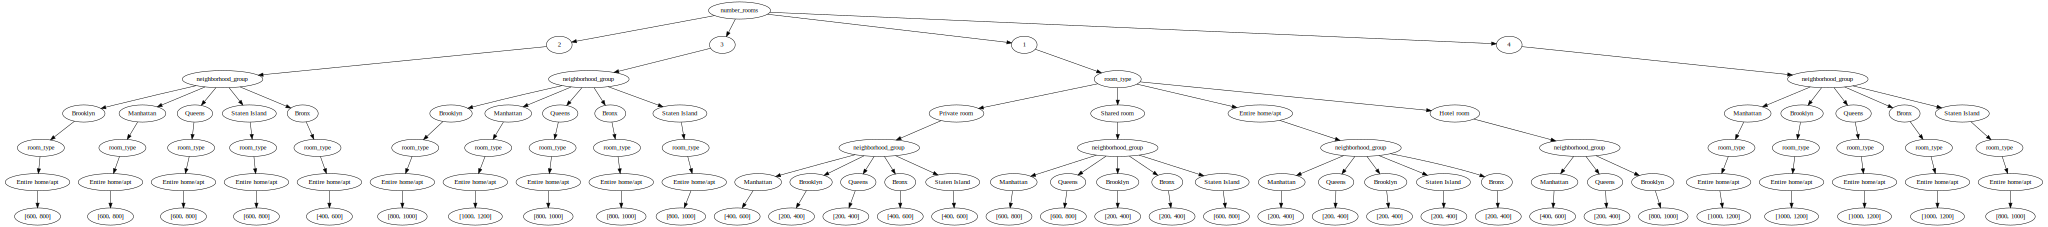

System entropy:  2.576345810159136


In [52]:
decisionTree = DecisionTree(x_train.values.tolist(), x_train.columns.tolist(), y_train.values.tolist(), "entropy")
decisionTree.id3(0,10)
dot=decisionTree.print_visualTree( render=True )
display(dot)
print("System entropy: ", format(decisionTree.entropy))

What is the first feature the decision tree splits on?

_Answer:_ Number of rooms



Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_  Manhattan, 1-room, Private room : 500, while Staten Island, 1-room, Shared room: 700


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [19]:
my_apartment_price=700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [53]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [54]:
predicted_bins = []
for i in range(x_test.shape[0]):
    predicted_bins.append(get_predicted_bin(x_test.iloc[i],features,predictor))

You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [55]:
#Get mean of each bin
predicted_price=[]
for i in range(len(predicted_bins)):
    n=predicted_bins[i].replace("[", "").replace("]", "")
    n1, n2 = map(float, n.split(","))
    predicted_price.append((n1+n2)/2)
#Get true price of each bin
true_price=[]
l=list(y_test)
for i in range(len(l)):
    n=l[i].replace("[", "").replace("]", "")
    n1, n2 = map(float, n.split(","))
    true_price.append((n1+n2)/2)
print(f"The mean absolute error is: {mean_absolute_error(true_price, predicted_price):.3f}" )

The mean absolute error is: 257.091


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 


K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [18]:
target_data=data2['price']
train_data=data2[['number_rooms','room_type','neighborhood_group']].copy()
x_train,x_test,y_train,y_test=train_test_split(train_data,target_data,test_size=0.05,random_state=209)
x_train0=x_train.copy()
x_test0=x_test.copy()
y_train0=y_train.copy()
y_test0=y_test.copy()
x_train0.neighborhood_group=x_train0.neighborhood_group.astype('category').cat.codes
x_train0.room_type=x_train0.room_type.astype('category').cat.codes
x_train2=pd.DataFrame()
scaler = StandardScaler()
a=list(x_train0.columns)
for i in range(len(a)):
    b=scaler.fit_transform(np.array(x_train0[a[i]]).reshape(-1,1))
    x_train2[a[i]]=b.reshape(-1).tolist()
x_train2 = x_train2.join(pd.DataFrame(list(y_train),columns =['price']))

### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

Text(0.5, 1.0, 'Number of clusters vs. Stdv')

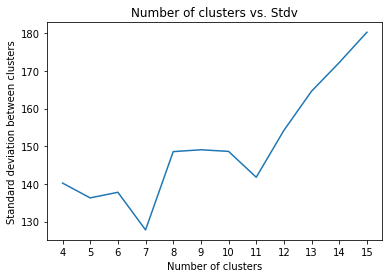

In [19]:
num_clus=[]
stdev=[]
mean_val=[]
for i in range(4,16):
    kmeans = KMeans(n_clusters=i, random_state=100, n_init=100).fit(x_train2[['number_rooms','room_type','neighborhood_group']].values)
    x_train2['cluster'] = kmeans.labels_
    num_clus.append(i)
    stdev.append(np.std(list(x_train2.groupby('cluster').mean().price)))
plt.plot(num_clus, stdev)
plt.xticks(num_clus)
plt.xlabel("Number of clusters")
plt.ylabel("Standard deviation between clusters")
plt.title("Number of clusters vs. Stdv")

_Answer:_
There is no right answer for that. But based on the figure above and the notion that the variance between clusters must be maximum and the trade off and clustering further and further will be cosuming it appears that 8 clusters would be more efficient as they have adequate clusters while not having too much clusters.


**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [20]:
x_train2_x=x_train2[['number_rooms','room_type','neighborhood_group','price']].copy()
kmeans9 = KMeans(n_clusters=9, random_state=100, n_init=100).fit(x_train2_x[['number_rooms','room_type','neighborhood_group']].values)
x_train2_x['cluster'] = kmeans9.labels_
#Introduncing normalized values of my apartment as a dataframe fro prediction
my_apartment = pd.DataFrame([[0.6858485 , -0.90968324,  0.37461244]])
print("The mean price for the cluster in which my apartment belong to:",round(list(x_train2_x.groupby('cluster').mean().price.iloc[kmeans9.predict(my_apartment)])[0],2))

The mean price for the cluster in which my apartment belong to: 652.27


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [26]:
import umap.umap_ as umap
import sklearn
#Preprocessing numerical
full_data = x_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

c:\Users\satur\anaconda3\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

[Text(0.5, 1.0, 'Clusters scatter plot')]

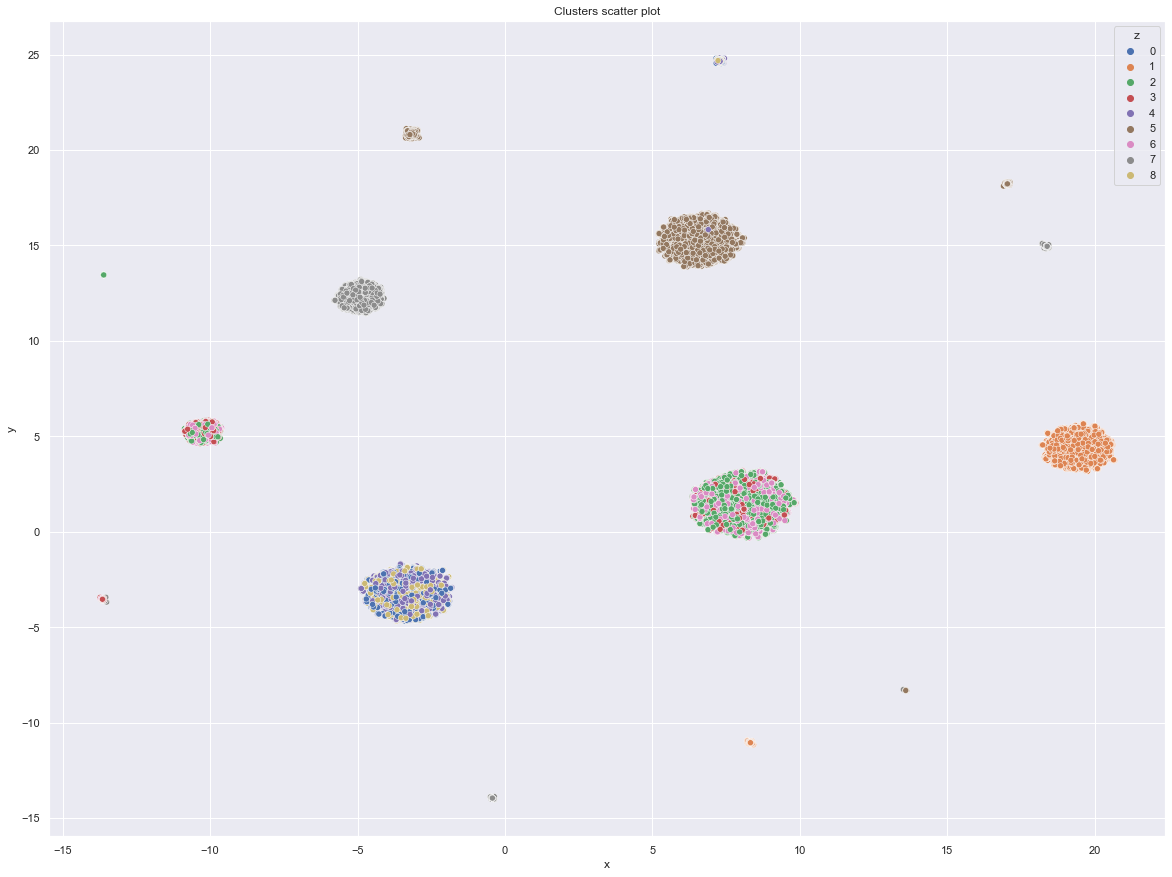

In [89]:
df_fig = pd.DataFrame(list(zip(dimension1,dimension2,x_train2_x['cluster'])),columns=['x','y', 'z'])
sn.set(rc={'figure.figsize':(20,15)})
sn.scatterplot(data=df_fig, x="x", y="y", hue="z",palette="deep").set(title='Clusters scatter plot')

_Answer:_ Cluster 1, 5, 7 and 8 seems like to have been clustered well and are uniform while clusters 0, 2, 3 and 6 are not that well clustered and they were clustered in many parts inappropriately. The problem for clusters 2, 3 and 6 is  ore severe.



We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [100]:
train_data.neighborhood_group=train_data.neighborhood_group.astype('category').cat.codes
train_data.room_type=train_data.room_type.astype('category').cat.codes
train_data2=pd.DataFrame()
a=list(train_data.columns)
for i in range(len(a)):
    b=scaler.fit_transform(np.array(train_data[a[i]]).reshape(-1,1))
    train_data2[a[i]]=b.reshape(-1).tolist()
x_train3,x_test3,y_train3,y_test3=train_test_split(train_data2,target_data,test_size=0.05,random_state=100)
x_train3['price'] = list(y_train3)
kmeans9 = KMeans(n_clusters=9, random_state=100, n_init=100).fit(x_train3[['number_rooms','room_type','neighborhood_group']].values)
x_train3['cluster'] = kmeans9.labels_
predicted_cluster=list(kmeans9.predict(x_test3.values))
clus_pri = {range(9)[i]: list(x_train3.groupby('cluster').mean().price)[i] for i in range(9)}
predicted_price=[]
for i in range(len(predicted_cluster)):
    predicted_price.append(clus_pri[predicted_cluster[i]])
print("The mean absolute error between predicted values and real value is:",mean_absolute_error(list(y_test3),predicted_price ))

The mean absolute error between predicted values and real value is: 256.05963675416615


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_ Using the baseline method does not seem to provide any good results and it has high error. The decision tree and clustering method results are close to each other regarding the error but since they both allocate the price to a bin or an averaged value they cannot be that accurate either although their results are not that dar off the true price.



## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

[Text(0.5, 1.0, 'Utilization vs price for number of rooms')]

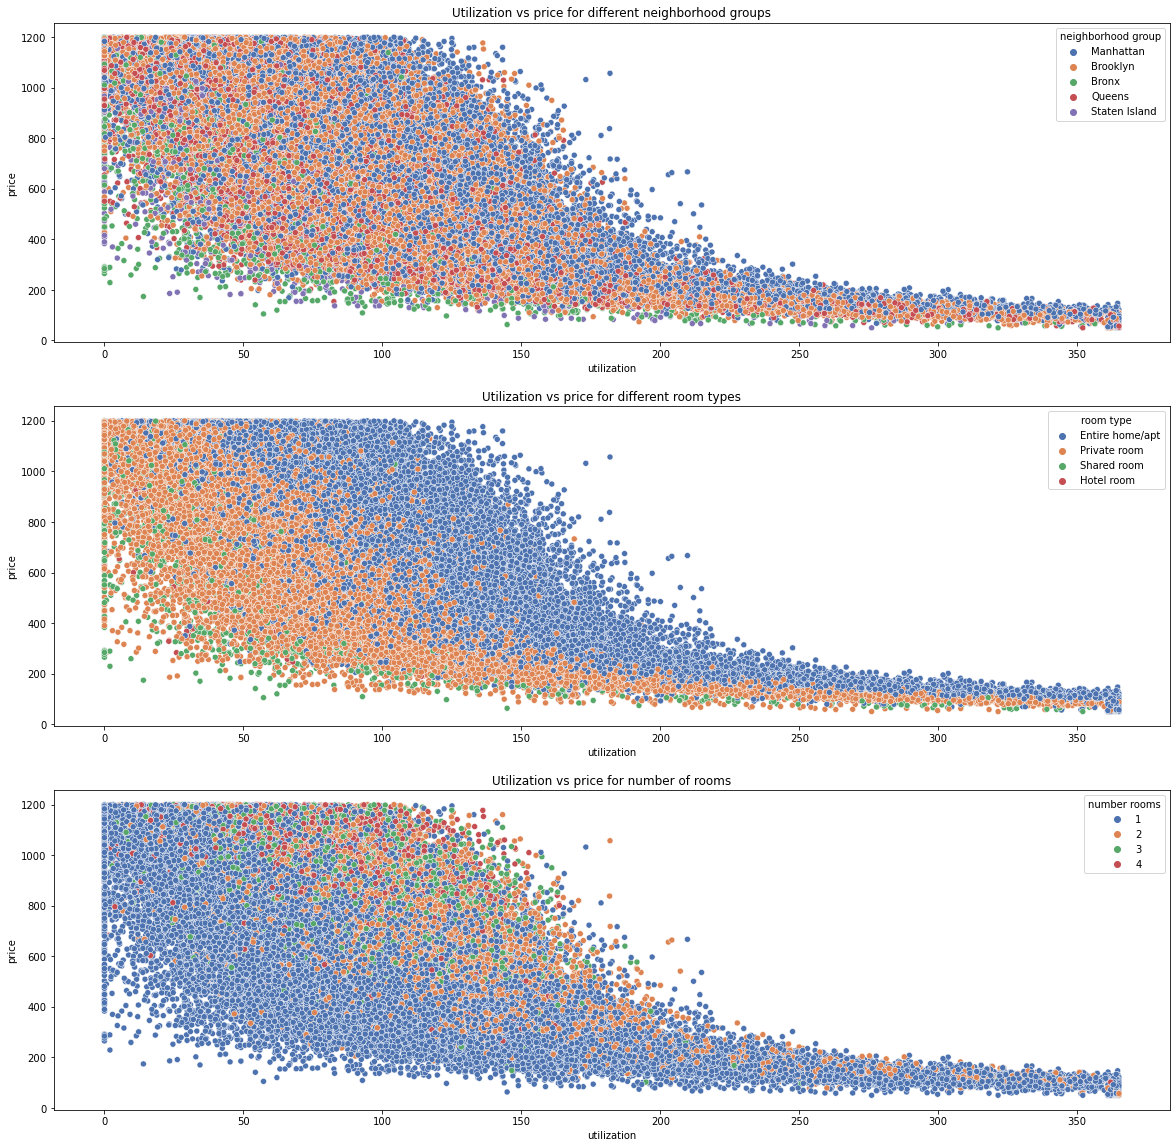

In [3]:
fig, axs = plt.subplots(nrows=3,figsize=(20, 20))
data6=pd.read_csv("AirBnB_utilization.csv")
sn.scatterplot(data=data6, x="utilization", y="price", hue="neighborhood group",palette="deep",ax=axs[0]).set(title='Utilization vs price for different neighborhood groups')
sn.scatterplot(data=data6, x="utilization", y="price", hue="room type",palette="deep",ax=axs[1]).set(title='Utilization vs price for different room types')
sn.scatterplot(data=data6, x="utilization", y="price", hue="number rooms",palette="deep",ax=axs[2]).set(title='Utilization vs price for number of rooms')

In [ ]:
#It seems that number of rooms can show price elacticity better than the other two as they are more divided although room type seems to be very good as well.

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [4]:
train_data3=data6[['number rooms','room type','neighborhood group','price']].copy()
target_data3=data6[['utilization']].copy()
train_data3['neighborhood group']=train_data3['neighborhood group'].astype('category').cat.codes
train_data3['room type']=train_data3['room type'].astype('category').cat.codes
train_data4=pd.DataFrame()
scaler = StandardScaler()
a=list(train_data3.columns)
for i in range(len(a)):
    b=scaler.fit_transform(np.array(train_data3[a[i]]).reshape(-1,1))
    train_data4[a[i]]=b.reshape(-1).tolist()
x_train4,x_test4,y_train4,y_test4=train_test_split(train_data4,target_data3,test_size=0.05,random_state=100)


In [5]:
#Make a list of apartments in my condition (2 room, Manhattanm, Entire home)
m=[]
for i in range(len(data6)):
    if data6['number rooms'][i]==2:
        if data6['neighborhood group'][i]=="Manhattan":
            if data6['room type'][i]=="Entire home/apt":
                m.append(i)
                
List_my_apartment=train_data4.iloc[m,:].copy()
my_apartment_prices=data6['price'][m].copy()

For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [18]:
reg = LinearRegression().fit(x_train4,y_train4)


What is the mean absolute error achieved on the test data?

In [5]:
# Your answer goes here
cv1=cross_val_score(estimator=reg, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
print("Mean absolute error for linear regression is:",np.average(abs(cv1)))

Mean absolute error for linear regression is: 35.55764154570278


Show (draw!) the price elasticity for your apartment. 

Text(0.5, 1.0, 'predicted Price elasticity for my apartment using linear regression')

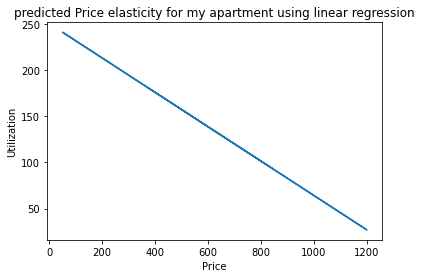

In [19]:
myapartment_reg=reg.predict(List_my_apartment)
plt.plot(my_apartment_prices,myapartment_reg)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.title("predicted Price elasticity for my apartment using linear regression")

#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [10]:
lsvr = LinearSVR(C=1000).fit(x_train4,y_train4)

c:\Users\satur\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\satur\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


What is the mean absolute error achieved on the test data?

In [11]:
cv2=cross_val_score(estimator=lsvr, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
print("Average mean absolute error for Linear SVR is:",np.average(abs(cv2)))

Average mean absolute error for Linear SVR is: 33.55692192405965


Show (draw!) the price elasticity for your apartment. 

Text(0.5, 1.0, 'predicted Price elasticity for my apartment using linear SVR')

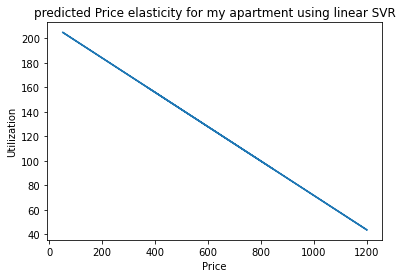

In [75]:
myapartment_lsvr=lsvr.predict(List_my_apartment)
plt.plot(my_apartment_prices,myapartment_lsvr)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.title("predicted Price elasticity for my apartment using linear SVR")

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [5]:
x_train4_2,x_test4_2,y_train4_2,y_test4_2=train_test_split(train_data4,target_data3,test_size=0.5,random_state=100)
krr = KernelRidge(alpha=1.0,kernel='polynomial',degree=2).fit(x_train4_2,y_train4_2)

What is the mean absolute error achieved on the test data?

In [8]:
cv3=cross_val_score(estimator=krr, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
print("Average mean absolute error for Kerneled regression is:",np.average(abs(cv3)))

Average mean absolute error for Kerneled regression is: 28.419935809300163


Show (draw!) the price elasticity for your apartment. 

Text(0.5, 1.0, 'predicted Price elasticity for my apartment using Poynomial kerneled regression')

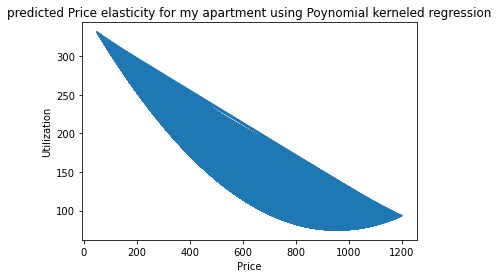

In [10]:
myapartment_krr=krr.predict(List_my_apartment)
plt.plot(my_apartment_prices,myapartment_krr)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.title("predicted Price elasticity for my apartment using Poynomial kerneled regression")

#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [11]:
reg4=SVR(kernel = 'rbf').fit(x_train4,y_train4)
reg5=SVR(kernel = 'sigmoid').fit(x_train4,y_train4)
reg6=SVR(kernel = 'poly', degree=3).fit(x_train4,y_train4)

c:\Users\satur\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\satur\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\satur\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


What is the mean absolute error achieved on the test data?

In [13]:
cv5=cross_val_score(estimator=reg4, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
cv6=cross_val_score(estimator=reg5, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
cv7=cross_val_score(estimator=reg6, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
print("Mean absolute error for SVR with RBF kernel is:",np.average(abs(cv5)))
print("Mean absolute error for SVR with Sigmoid kernel is:",np.average(abs(cv6)))
print("Mean absolute error for SVR with polynomial kernel of degree 3 is:",np.average(abs(cv7)))

Mean absolute error for SVR with RBF kernel is: 32.61338086245068
Mean absolute error for SVR with Sigmoid kernel is: 44.36922649667933
Mean absolute error for SVR with polynomial kernel of degree 3 is: 33.54218366337252


In [78]:
reg4=SVR(kernel = 'rbf').fit(x_train4,y_train4)

c:\Users\satur\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Show (draw!) the price elasticity for your apartment. 

Text(0.5, 1.0, 'predicted Price elasticity for my apartment using kerneled SVR')

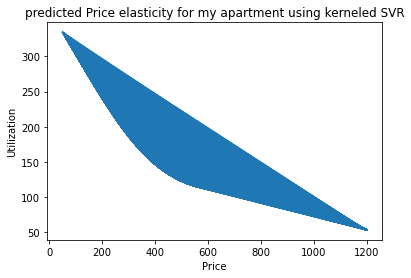

In [79]:
myapartment_ksvr=reg4.predict(List_my_apartment)
plt.plot(my_apartment_prices,myapartment_ksvr)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.title("predicted Price elasticity for my apartment using kerneled SVR")

What is your conclusion on using kernels?

_Answer:_ RBF kernel improved the results more than the others as well as linear SVR while linear SVR had better results than the sigmoid and polynomial one.


#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [11]:
reg7=MLPRegressor(hidden_layer_sizes=(150,100,50),max_iter = 400,activation = 'relu',solver='adam').fit(x_train4,y_train4)

c:\Users\satur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


What is the mean absolute error achieved on the test data?

In [12]:
cv8=cross_val_score(estimator=reg7, X=x_test4, y=y_test4, cv=5, scoring="neg_mean_absolute_error",n_jobs=5)
print("Mean absolute error of MLP regressor is:",np.average(abs(cv8)))

Mean absolute error of MLP regressor is: 19.982512053550842


Show (draw!) the price elasticity for your apartment. 

Text(0.5, 1.0, 'predicted Price elasticity for my apartment using MLP regressor')

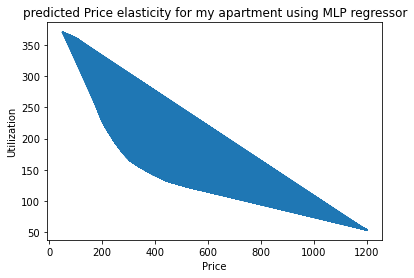

In [13]:
myapartment_MLP=reg7.predict(List_my_apartment)
plt.plot(my_apartment_prices,myapartment_MLP)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.title("predicted Price elasticity for my apartment using MLP regressor")

### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [44]:
myapartment_MLP=reg7.predict(List_my_apartment)
n2=my_apartment_prices.to_numpy()
r=[]
for i in range(len(n2)):
    r.append(n2[i]*myapartment_MLP[i])
print ('Optimum price based on MLP regressor elasticity is:',n2[r.index(np.max(r))])

Optimum price based on MLP regressor elasticity is: 883


_Answer:_ The clustering method predicted that the price for my apartment should be around 652.27 which is the mean of the cluster that my apartment was into yet, in decision tree method, the average price of the bin that contained my apartment was 700 and finally the optimum price based on the annual income from utilization and price of MLP regressor shows 883 dollars for 90 days utilization is the best one. So basically decision tree provided better results since it was in the bin of [600-800] and so closer to the optimum value.


# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

1.First of all variables the we would like to include in our estimations must be carefully investigated as some of them are obviously not helping there are some that have high correlations without having an effect on the estimation as they are derived from the target feature (Service fee here).<br>

2.The correlation matrix with target feature can help in case that they are not categorical data.<br>

3.Distribution of variables and target features must be investigated as in case of uniform features regression lines are not helpful (number of minimum nights).<br>

4.Compairing the boxplots based on their medians, range and interquartile range can be a good indicator for finding the most suitable combination of data for implementing as features. here they indicated that combinations of room type with number of rooms and construction year is a good combination but the best combination is the combination of neighborhood group and number of rooms.<br>

5.Baselines can be helpful for rough estimations but in case of uniform distribution they yield substantial error.<br>

6.Decision trees are suited for categorical data and in case we want to predict a numerical factor we have to compromise by introducing bins of target feature that introduce error to estimations.<br>

7.Clustering technique can also be implemented to predict numerical value but in that case the quality of the prediction is directly related to the quality of clustering and in case that clusters are not homogeneous, they are not that robust since the mean value for the target feature varies and inhomogeneous clusters might have the same mean value form the target feature indicating nothing.<br>

8.Using number of clusters vs. standard deviation of target features withing clusters graph can be a good indicator to find the optimum number of clusters.<br>

9.Error values for decision tree method and clustering method in our case was almost the same as they are both indirect methods.<br>

10.Kernel regressions work better than linear ones but they are computationally consuming. In that regard RBF kernel works better than the rest.<br>

11.In case of complex relationships using non-linear regressors yield better results.<br>

12.If we have enough data, using MLP method can provide the best results amongst the tried methods but they must be optimized with a grid search.<br>

13.Using a MLP regressor and involving price elasticity can provide us with the optimum results which are better than the decision tree and clustering method. But decision tree method results was better compared to clustering method.<br>
